# k-Nearest-Neighbors



## Agenda

 * Talk about models
 * Talk about SKlearn
 * Describe KNN
 * Describe KNN for regression vs. classification
 * Describe KNN hyperparameters
 * Distance metrics
 * Curse of Dimensionality
 

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#knn_plotting.py  import plot_distances
plt.rcParams['figure.dpi'] = 200 
train_set = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/train_1.csv')
test_set = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/test_df1.csv') 

train1 = train_set.drop(['Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1', 'Registration_Date','Employer_Category','Patient_ID','First_Interaction', 'Health_Camp_ID','Income',
'Education_Score','Age', 'City_Type', 'Job_Type', 'Education_Score2',
'Education_Scorez',],axis=1) 

test_set = test_set.drop(['Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1','Registration_Date','Employer_Category','Patient_ID','First_Interaction', 'Health_Camp_ID','Income',
'Education_Score','Age', 'City_Type', 'Job_Type', 'Education_Score2',
'Education_Scorez',],axis=1) 
train2,test2 = train1.drop(['Unnamed: 0.1.1.1', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '9999', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'Z', 'Edu1', 'Edu2'],axis=1),test_set.drop(['Unnamed: 0.1.1.1', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '9999', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'Z', 'Edu1', 'Edu2'],axis=1)
y1, y2 = train2.pop('Event1_or_2') , test2.pop('Event1_or_2')
print(test2.columns) 

Index(['test1df1', 'test1df2', 'test1df3', 'test1df4', 'test1df5'], dtype='object')


## What is a model?

- A machine learning model can be a mathematical representation of a real-world process. To generate a machine learning model you will need to provide training data to a machine learning algorithm to learn from.


- A statistical model is a mathematical model that embodies a set of statistical assumptions concerning the generation of sample data (and similar data from a larger population). A statistical model represents, often in considerably idealized form, the data-generating process.   


- A statistical model is usually specified as a mathematical relationship between one or more random variables and other non-random variables. As such, a statistical model is "a formal representation of a theory" (Herman Adèr quoting Kenneth Bollen).    


- A model may help to explain a system and to study the effects of different components, and to make predictions about behaviour.

<img src="images/intro_slide.png" />


In [2]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from knn_plotting import plot_distances

# plt.style.use('ggplot')

## Before we talk about KNN 
Lets review what data looks like and some standard practices.

For this example we will be trying to predict the field (variable) `mpg` called the target using the other fields (variables / features).  
By standard you will see them referenced in code as: 
```
y => Traget variable   
X => Features   
```

Note that `y` is lower case and `X` is capitalized.

### Sklearn and OOP (again, and again, and again)
     
Sklearn follows a very nice OOP layout which makes using it very easy once we learn the basics.  This easy interface makes modeling easy.  Its the understanding of what is going on behind the code and not just your ability to use the code that makes you a data scientist.



In [3]:
class ModelClass:

    def __init__(self, *arg, **kwargs):
        '''
        Establishes hyperparameters
        '''
        pass
    
    def fit(self, X, y): 
        '''
        X = training data features
        y = training data labels
        
        Takes in training data; stores whatever
        information is need to make future predictions
        '''
        pass
    
    def predict(self, x):  
        '''
        x = new data point (features, only)
        
        Returns label prediction for x
        '''
        pass
    
    def predict_proba(self, x):  
        '''
        x = new data point (features, only)
        
        If classification model: returns probabilty
        of x belonging to each class
        '''
        pass

Lets make a mean Regressor model to practice this interface.  

In [4]:
class Mean_Regressor():
    
    def __init__(self, *arg, **kwargs):    #no hyperparameters
        pass
    
    def fit(self, X, y): 
        self.mean_prediction = y.mean()
        return self
    
    def predict(self, x):  
        return self.mean_prediction

We will use the Boston housing dataset.  We will use the 3 columns 'Crime_Rate', 'Avg_Rooms', 'Pct_built_b4_1940'.

In [5]:

X = train2
y = y1

In [6]:
#X = features
X.head()

,train1_1,train1_2,train1_3,train1_4,train1_5
0,0.420086,-0.063285,-0.019631,-0.11236,1.442928
1,5.795981,1.263127,-0.019631,-0.11236,5.561781
2,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613
3,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613
4,1.862400,0.201998,-0.019631,-0.11236,5.561781


In [7]:
model = Mean_Regressor()

In [8]:
model.fit(X, y)

In [9]:
#Let's say we have a new town with these features:
'''
Crime_Rate            0.09
Avg_Rooms             6.41
Pct_built_b4_1940    84.10
'''

new_town = np.array([.09, 6.41, 84.10])

In [10]:
model.predict(test2)

0.6014373389303648

In [11]:
test2

,test1df1,test1df2,test1df3,test1df4,test1df5
0,0.021786,-0.063572,-0.023827,-0.155661,1.328418
1,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889
2,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889
3,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889
4,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889
...,...,...,...,...,...
35244,1.347295,0.438356,-0.023827,-0.155661,4.379033
35245,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889
35246,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889
35247,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889


## kNN (k Nearest Neighbors)

Over the next weeks we'll talk about a number of machine learning models. The kNN model is a non-parametric supervised-learning model used for classification or regression. It is not the most practical, but it's a great example to get us started.

**Discussion:** What do all those words mean?

Today we'll mostly focus on regression, however we will start with classification as for an introduction 

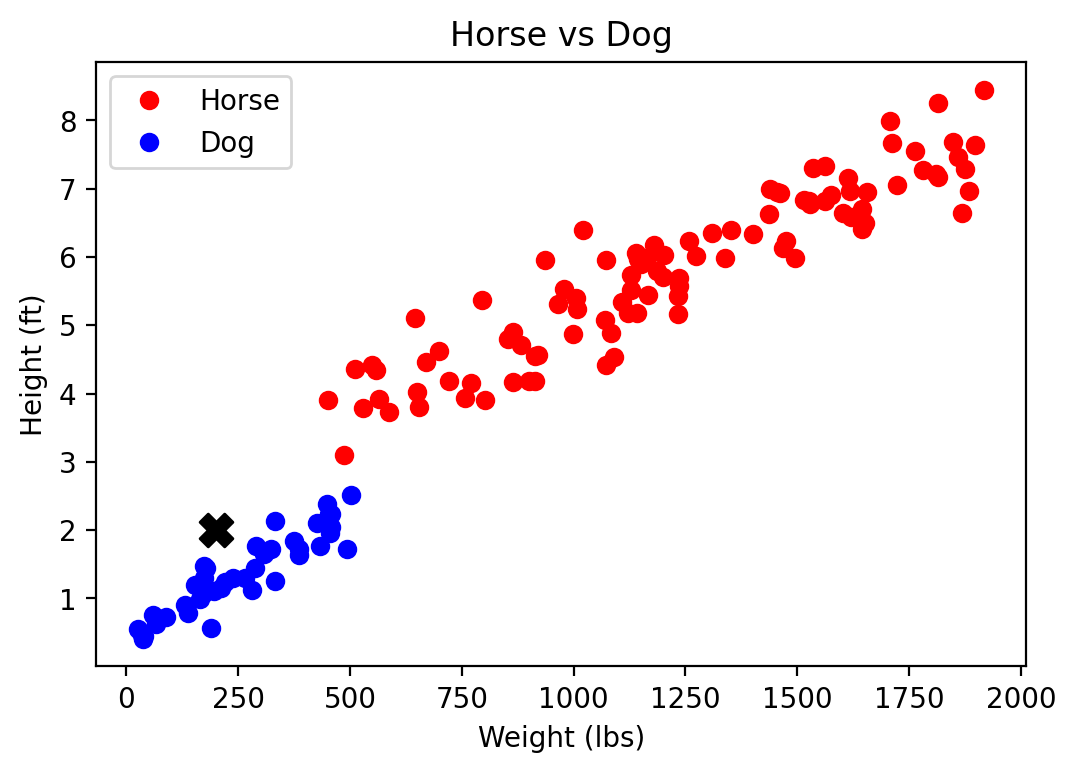

In [12]:
import scipy as sp

np.random.seed(7)  #7

horse_weight = np.random.rand(100) * 1500.0 + 400.0  + 50      # lbs
horse_height = horse_weight/370 + np.random.normal(0, 0.5, horse_weight.shape) + 2.5  # ft

dog_weight = np.random.rand(40) * 500.0 + 10.0      # lbs
dog_height = dog_weight/300 + np.random.normal(0, 0.3, dog_weight.shape) + 0.5  # ft

plt.plot(horse_weight, horse_height, 'ro', label='Horse')
plt.plot(dog_weight, dog_height, 'bo', label='Dog')
plt.scatter(200,2, marker='X', c='black', s=140)
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.legend()
plt.show()

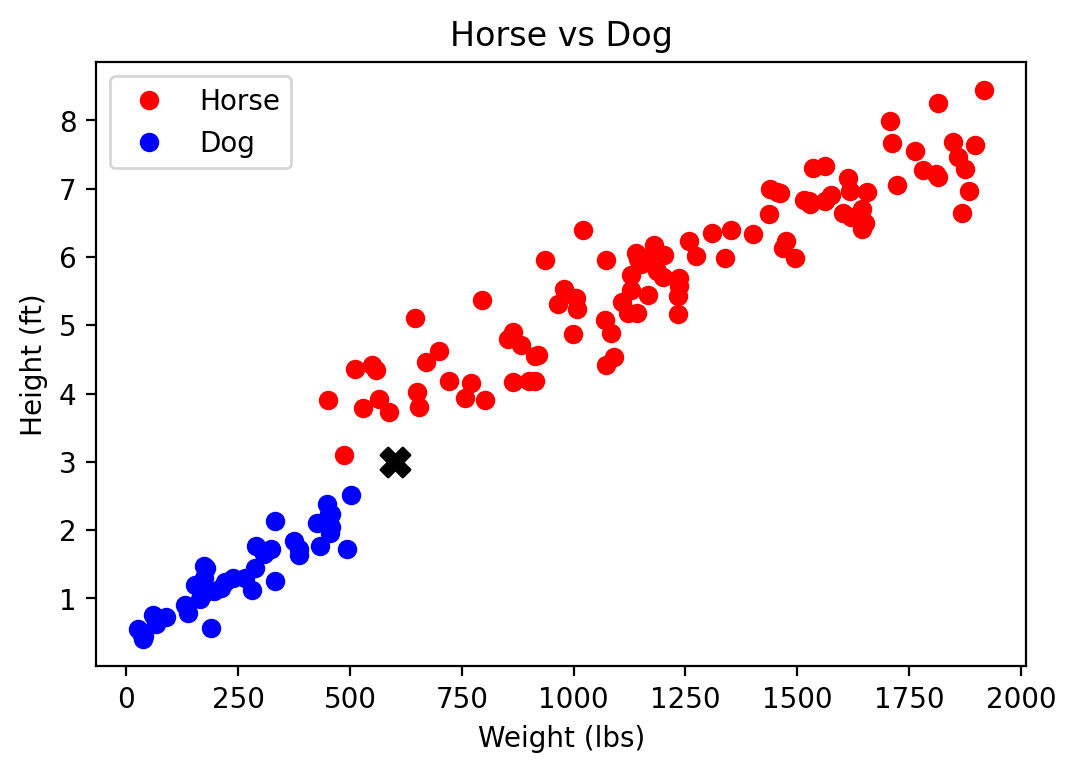

In [13]:
import scipy as sp

np.random.seed(7)  #7

horse_weight = np.random.rand(100) * 1500.0 + 400.0  + 50      # lbs
horse_height = horse_weight/370 + np.random.normal(0, 0.5, horse_weight.shape) + 2.5  # ft

dog_weight = np.random.rand(40) * 500.0 + 10.0      # lbs
dog_height = dog_weight/300 + np.random.normal(0, 0.3, dog_weight.shape) + 0.5  # ft


plt.plot(horse_weight, horse_height, 'ro', label='Horse')
plt.plot(dog_weight, dog_height, 'bo', label='Dog')
plt.scatter(600, 3, marker='X', c='black', s=110)
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.legend()
plt.show()

Is anyone concerned about the 500 pound dogs we are seeing?

## Looking at regression



In [15]:
# cars = pd.read_csv('data/cars_multivariate.csv', na_values=['?'])
# cars = cars[cars.horsepower.notnull()]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
im =ax.scatter(cars.horsepower, cars.weight, c=cars.mpg)
ax.set_xlabel('Horse Power')
ax.set_ylabel('Weight')
ax.set_title('Car Weight vs Horse Power')
fig.colorbar(im, ax=ax)

In [ ]:
section = cars[(cars.horsepower > 75) & (cars.horsepower < 100)]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
im =ax.scatter(section.horsepower, section.weight, c=section.mpg)
ax.set_xlabel('Horse Power')
ax.set_ylabel('Weight')
ax.set_title('Car Weight vs Horse Power')
fig.colorbar(im, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
im =ax.scatter(section.horsepower, section.weight, c=section.mpg)
ax.scatter([82],[2250],s=[170], marker='x')
ax.set_xlabel('Horse Power')
ax.set_ylabel('Weight')
ax.set_title('Car Weight vs Horse Power')
fig.colorbar(im, ax=ax)

What should we be looking at?  

In [ ]:
sub = section[(section.horsepower > 79) & (section.horsepower < 86 ) & (section.weight < 2550) & (section.weight > 2000)]

In [ ]:
x = sub.horsepower.values
y = sub.weight.values

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(sub.horsepower, sub.weight)
ax.scatter([82],[2250],s=[170], marker='x')
ax.set_xlabel('Horse Power')
ax.set_ylabel('Weight')
ax.set_title('Car Weight vs Horse Power')


for i, txt in enumerate(sub.mpg):
    ax.annotate(str(txt), (x[i], y[i]), fontsize=12)


### Making a prediction?




<img src="images/regression_knn.png" width=500 align="left"/>

Let the k nearest points have distances $$d_1, d_2,..., d_k$$

Let the k nearest points have targets $$t_1, t_2,..., t_k$$

Predict the mean value of the targets.

# KNN Regression the algorithm    
   
      
         
### What are the steps?

Training algorithm:   

 - Store all the data… that’s all.   
 
Prediction algorithm (predict the value of a new point $x$):   

 - Calculate the distance from $x$ to all points in your dataset.
 - Sort the points in your dataset by increasing distance from $x$.
 - Get the average of the target of the $k$ closest points.   
    
       
         
         

## Distance Metrics

So far we've used euclidean distance for a metric; there are other choices.

### Manhattan Distance
City blocks, L1

*Manhattan* distance is the distance as measured along axes at right angles:

$$\sum_i |a_i - b_i|$$


### Euclidean Distance

Straight line, L2

*Euclidean* distance is the distance metric you're most familiar with:

$$ d(\mathbf{a}, \mathbf{b}) = ||\mathbf{a} - \mathbf{b}|| \ = \sqrt{\sum (a_i - b_i)^2} $$



#### sklearn default is [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance) (with p=2 which is really just euclidean, p=1 is manhattan)    
    
        
        
             

## What will happen as we change $K$

### Looking at predicting MPG given Horsepower

In [16]:
y2

0        1
1        1
2        1
3        0
4        0
        ..
35244    1
35245    0
35246    1
35247    0
35248    1
Name: Event1_or_2, Length: 35249, dtype: int64

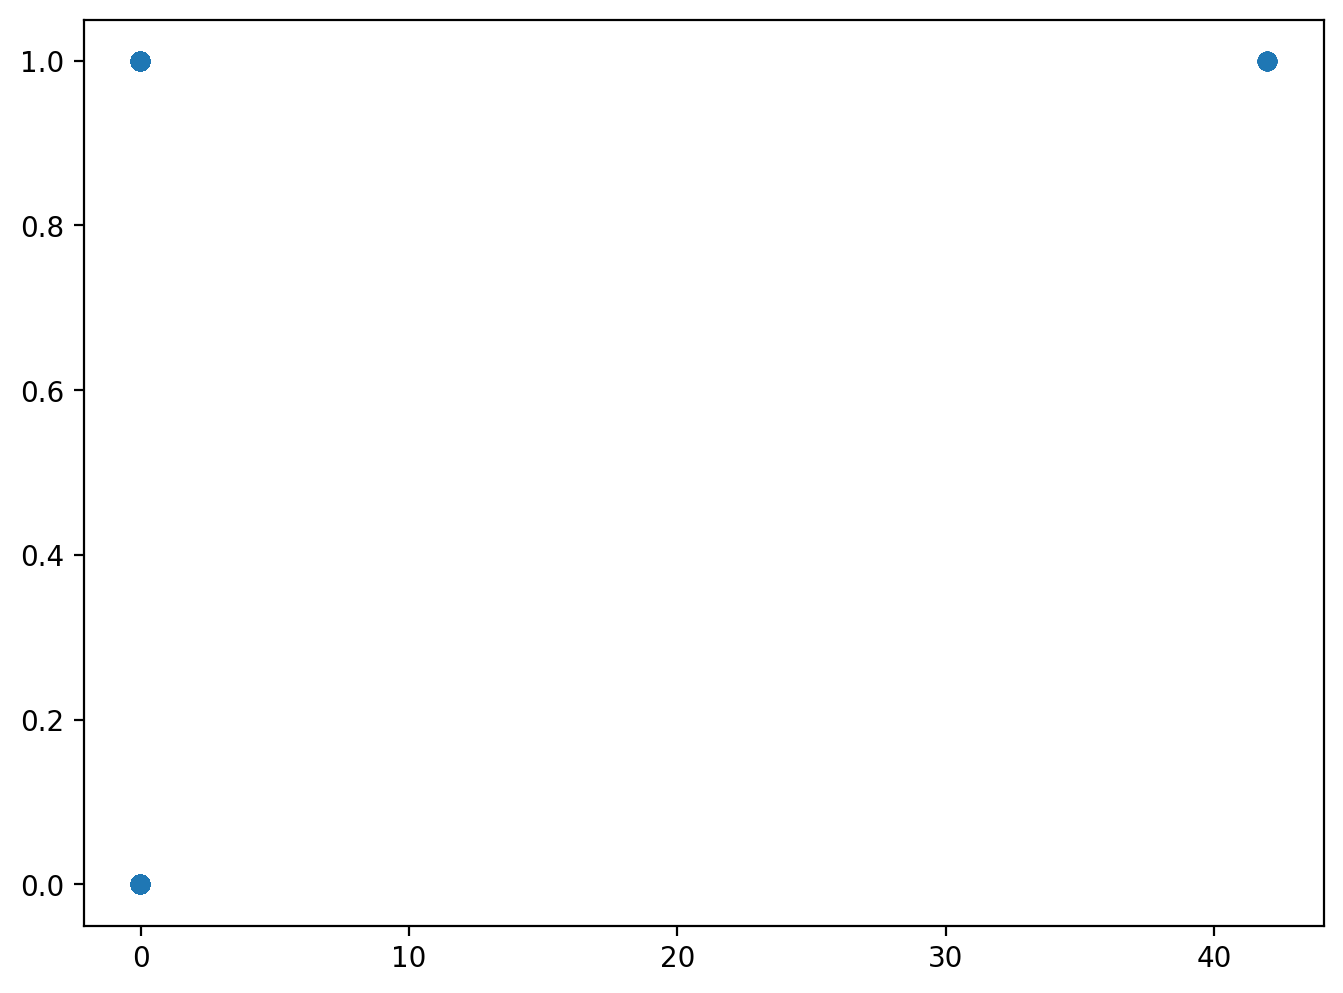

In [17]:
X = test2.test1df3.values
y = y2.values  

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X,y)

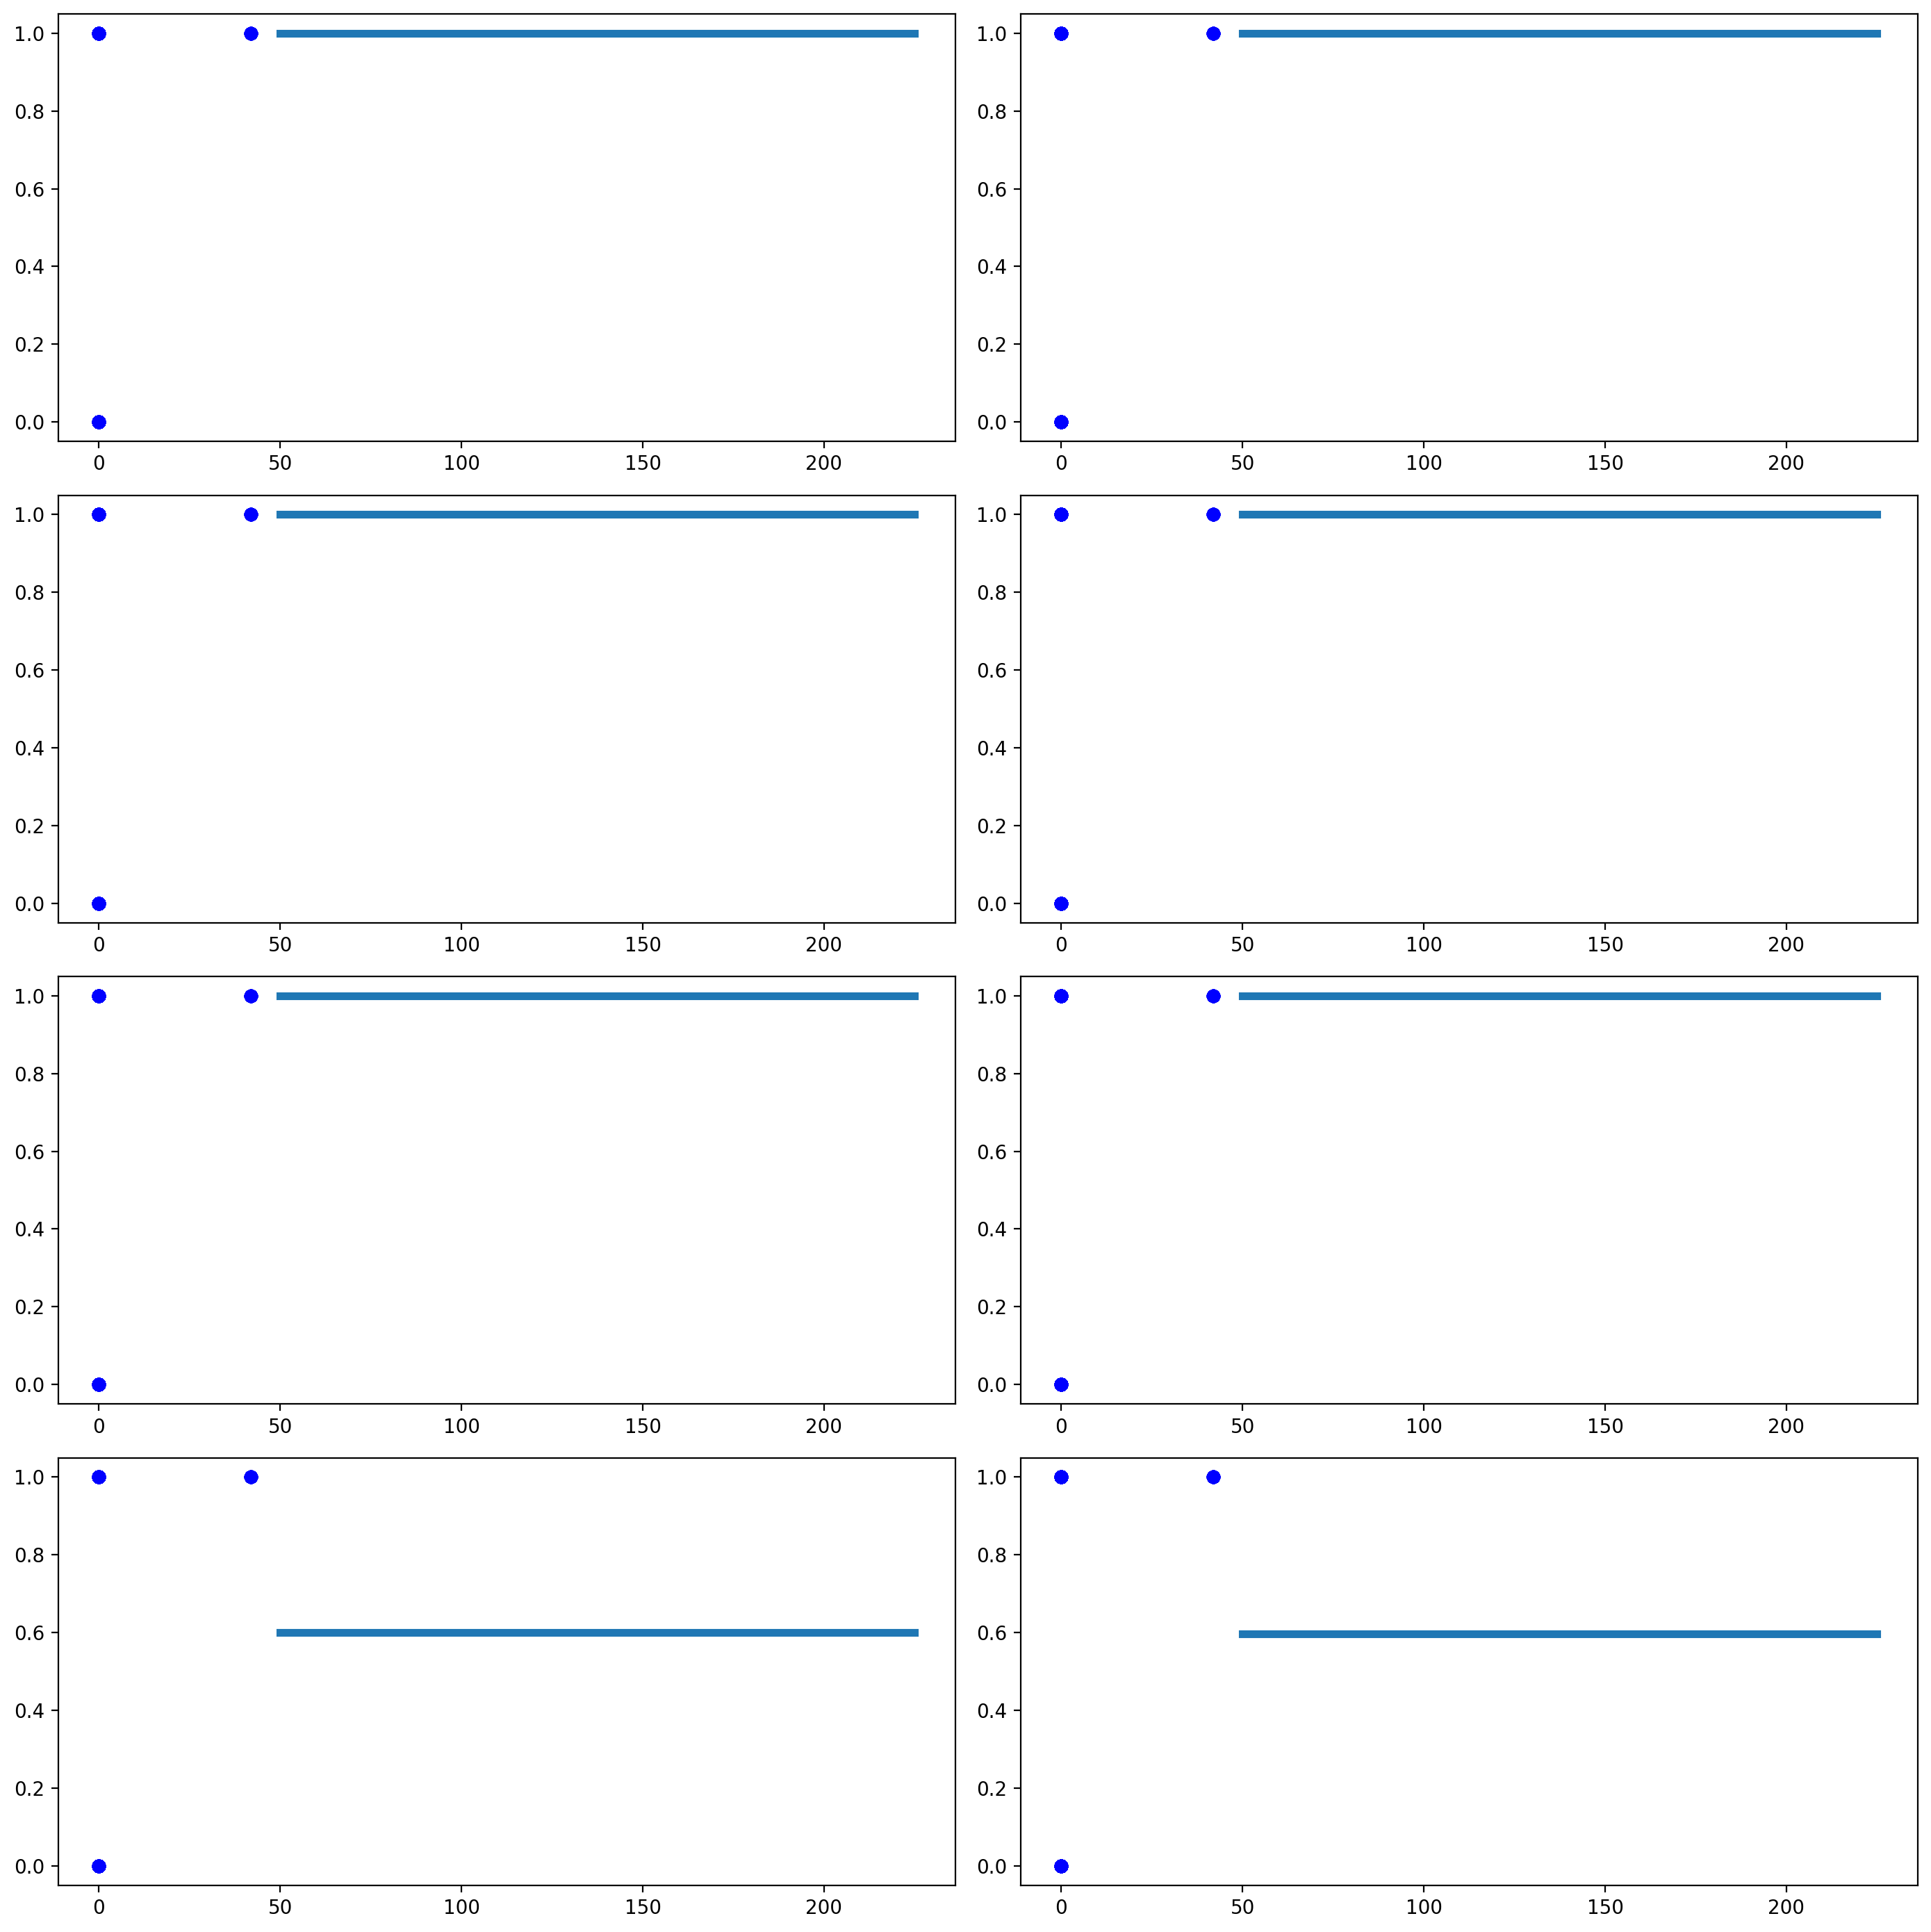

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(14, 14))
x_tick = np.linspace(50, 225, 150)
k_num = [1, 3, 5, 10, 15, 20, 100, 392]

for k, ax in zip(k_num,axs.flatten()):
    model = KNeighborsRegressor(k)
    model.fit(X.reshape(-1,1),y.reshape(-1,1))
    ax.scatter(X,y,c='blue')
    ax.plot(x_tick, model.predict(x_tick.reshape(-1,1)), linewidth=4)

fig.tight_layout()
    


In the start with a low $k$ the model fits closely to a given point meaning we can be **overfit**.

As $k$ is increased more points are included for the mean calculation so a more general result is given which can lead to a **underfit** model

# Choosing k

How do we figure out the best value for k?

In general, a good starting point for k is $\sqrt{n}$

Let's investigate for various values.

## First we need a way to see how well our prediction does

### Ideas?

For our example of we choose k = 5 and found the prediction was 34.24 mpg and the actual was 32 mpg 

# How well did we do?

How can we measure the error? The typical choice is to use mean squared error. The error for a given data point is the difference between the observed value and the predicted value
$$
MSE := \frac{1}{n} \sum_{i=1}^n (\hat{y_i} - y_i)^2
$$

## R-Squared

Mean squared error is a good error metric, however the result you are looking for is dependent on the data set. For a more general result there is a scaled version called $R^2$. 
\begin{align}
    R^2 &:= 1 - \frac{SS_{res}}{SS_{tot}} \\
    &= 1 - \frac{\sum_{i=1}^n (\hat{y_i} - y_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    

Where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares. $R^2$ can be interpreted as the fraction of the variance in the data that is explained by the model.

$R^2$ will be between 0 and 1. 0 means that your model explains none of the variance in the data, while 1 means your model explains all of the variance in the data. The higher $R^2$, the better!

## Choosing k

In [19]:
def predict_sample(X, y,k,seed):
    clf = make_pipeline(  neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform'))
    clf.fit(train2, y1)
    
    return mean_squared_error(clf.predict(test2), y2)

In [20]:
X = test2[['test1df3', 'test1df4']].values
y = y2

In [21]:
max_k = 10
step = 1
results = []
for k in range(1, max_k, step):
    kresults = []
    for seed in range(100):
        kresults.append(predict_sample(X, y, k, seed))
    results.append(kresults)
results = pd.DataFrame(results)
fig, ax = plt.subplots(figsize=(12, 8))

data = np.array(results.T)
ax.boxplot(data, labels=range(1, max_k, step))
ax.set_xlabel("k")
ax.set_ylabel("MSE")
ax.set_title("MSE of kNN on Cars for Various k")
plt.show()

KeyboardInterrupt: 

## Scaling Data 

When dealing with models that measure distance it is important to scale the data so that it is in the same format.  All the plots we have looked at so far have been automatically scaled by matplotlib but lets look at a example to highlight the importance.

Below we are looking a the score on a exam given the amount of classes attended by the student and the hours they studied.


In [ ]:
x = [.1, .2, .65, .75, .9]
y = [3, 2, 16, 17, 19]
c = [.2, .3, .7, .8, .7] 
x_1 = .8
y_1 = 8.5
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.scatter([x_1],[y_1],s=[170], marker='x')
ax.set_xlabel('% Class Attended')
ax.set_ylabel('Hours Study')
ax.set_title('Score on Exam')


for i, txt in enumerate(c):
    ax.annotate(str(txt), (x[i], y[i]), fontsize=12)
    

In [ ]:
fig, ax = plt.subplots()
plot_distances(ax, x, y, c, x_1, y_1)

Are these the values you expected? Why not?  
   
## Looking at the data on the proper scale

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.set_xlim([0,20])
ax.set_ylim([0,20])
ax.scatter([x_1],[y_1],s=[170], marker='x')
ax.set_xlabel('% Class Attended')
ax.set_ylabel('Hours Study')
ax.set_title('Score on Exam')


for i, txt in enumerate(c):
    ax.annotate(str(txt), (x[i], y[i]), fontsize=12)
    


There are several functions we can use built into SKLearn to scale the data to avoid this issue.   
     
The [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which uses the formula of:
$$
z_i = \frac{x_i-\mu}{s}
$$
and [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). with formula:
$$
z_i = \frac{x_i - min(x)} {max(x) - min(x)}
$$

# These are SKlearn transformers 

What does the layout of a transformer look like?

In [ ]:
class MyStandardScaler():

    def __init__(self):
        pass

    def fit(self, X, y=None):
        self._var = X.values.var(axis=0)
        self._mean = X.values.mean(axis=0)
        return self

    def transform(self, X):
        X -= self._mean
        X /= self._var
        return X

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
scaler = MyStandardScaler()

In [ ]:
cars[['displacement','horsepower']].head()

In [ ]:
scaler.fit(cars[['displacement','horsepower']])

In [ ]:
scaler.transform(cars[['displacement','horsepower']])

# Curse of Dimensionality

### Perspective 1: Sample Density

Sampling density is proportional to $$N^\frac{1}{p}$$

where N is the number of samples and p is the number of dimensions.

Let's consider a data set with 100 samples that all have only one feature/predictor. But, you feel that one feature doesn't tell you enough to properly predict anything, so you set out to collect new data. The new data will have ten features/predictors for each sample. How many samples do we need to have an equally dense sample as our original dataset?

#### Original Sample

$$\begin{align}
          density & = N^\frac{1}{p} \\
          & = 100^\frac{1}{1} \\
          & = 100 
\end{align}$$

#### New Sample

$$\begin{align}
          N & = density^ p \\
          &= 100^{10} \\
          &= 100,000,000,000,000,000,000
\end{align}$$

No big, just one hundred quadrillion samples...

### Perspective 2: Loss of Locality

As we increase dimensionality, we lose the concept of locality and things get infinitely far apart. More precisely, samples that are similar no longer look similar and "closeness" becomes more arbitrary than meaningful. 

For example, in Euclidean distance we must be close in ***all*** dimensions to be considered close. If points are close in 2 of 3 dimensions, but far in the 3rd dimension then all points will be far apart.



# Back to Classification

In [ ]:
#Load in iris dataset
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

#Reduce the data down to 2 classes and 2 predictor variables
X = X[y != 0, :2] 

#Add some noise so data points aren't exactly duplicated
X = X + np.random.normal(0, .05, size = X.shape)

#Change Sepal Length from cm to mm to cause scaling issues
X[:,0] = X[:,0] * 10
y = y[y != 0] - 1

In [ ]:
def plot_flower_data(ax, X, y):
    ax.scatter(X[y == 0,0], X[y == 0,1], c = "orange", label = "versicolor")
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color = "black", label = "virginica")
    ax.set_xlabel("Sepal Length (mm)")
    ax.set_ylabel("Sepal Width (cm)")
    ax.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_flower_data(ax, X, y)

What do we predict for different values of k?

In [ ]:
def plot_mult_decision_boundary(ax, X, y, k, scaled=True, 
                                title='Title', xlabel='xlabel', 
                                ylabel='ylabel', hard_class = True):
    
    """Plot the decision boundary of a kNN classifier.
    
    Builds and fits a sklearn kNN classifier internally.

    X must contain only 2 continuous features.

    Function modeled on sci-kit learn example.

    Parameters
    ----------
    ax: Matplotlib axes object
        The plot to draw the data and boundary on
        
    X: numpy array
        Training data
    
    y: numpy array
        Target labels
    
    k: int
        The number of neighbors that get a vote.
        
    scaled: boolean, optional (default=True)
        If true scales the features, else uses features in original units
    
    title: string, optional (default = 'Title')
        A string for the title of the plot
    
    xlabel: string, optional (default = 'xlabel')
        A string for the label on the x-axis of the plot
    
    ylabel: string, optional (default = 'ylabel')
        A string for the label on the y-axis of the plot
    
    hard_class: boolean, optional (default = True)
        Use hard (deterministic) boundaries vs. soft (probabilistic) boundaries
    

    Returns
    -------
    None
    """
    x_mesh_step_size = 0.1
    y_mesh_step_size = 0.01
    
    #Hard code in colors for classes, one class in red, one in blue
    bg_colors = np.array([np.array([255, 150, 150])/255, np.array([150, 150, 255])/255])
    cmap_light = ListedColormap(bg_colors)
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    #Build a kNN classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    if scaled:
        #Build pipeline to scale features
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X, y)
    else:
        clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = 45, 85
    y_min, y_max = 2, 4
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_mesh_step_size),
                         np.arange(y_min, y_max, y_mesh_step_size))
    if hard_class:
        dec_boundary = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.pcolormesh(xx, yy, dec_boundary, cmap=cmap_light)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    else:
        dec_boundary = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        colors = dec_boundary.dot(bg_colors)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        ax.imshow(colors.reshape(200, 400, 3), origin = "lower", aspect = "auto", extent = (x_min, x_max, y_min, y_max))

    ax.set_title(title + ", k={0}, scaled={1}".format(k, scaled))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))

In [ ]:
some_ks = [1, 3, 5, 10, 25, 75]

title="Iris Decision Boundary"
xlabel="Sepal Length (mm)"
ylabel="Sepal Width (cm)"

# Building my plot, 3 rows x 2 columns
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
 
# Loop through the possible ks, put each decision boundary a separate axes
for k, ax in zip(some_ks, axs.flatten()):
    plot_mult_decision_boundary(ax, X, y, k=k, title = title, xlabel = xlabel, ylabel = ylabel)

# Keep things from overlapping
plt.tight_layout()
plt.show()

# Weighted Voting

Let the k nearest points have distances $$d_1, d_2,..., d_k$$

The ith point votes with weight of $$\frac{1}{d_i}$$

### Soft kNN

But a good classifier will return probabilities, not just classes. With kNN we use the number of neighbors of each class as the probability.

In [ ]:
# Building my plot, 3 rows x 2 columns
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
#ax.imshow()
# Loop through the possible ks, put each decision boundary a separate axes
for k, ax in zip(some_ks, axs.flatten()):
    plot_mult_decision_boundary(ax, X, y, k=k, title = title, xlabel = xlabel, ylabel = ylabel, hard_class = False)

# Keep things from overlapping
plt.tight_layout()
plt.show()

## Bias-Variance

What is bias and variance?

Class discussion: How does changing k affect each? Why?

In [ ]:
# Create samples from a multivariate normal distribution
# which approximates the input data
def gen_similar_samples(X, y, n_samples = 4, sample_size = 50):
    Xs = []
    ys = []
    for _ in range(n_samples):
        Xdata = np.zeros_like(X)
        ydata = np.zeros_like(y)
        for i, value in enumerate(np.unique(y)):
            Xdata[i*sample_size:(i+1)*sample_size] = np.random.multivariate_normal(X[y == value].mean(axis = 0), 
                                                                                   np.cov(X[y == value].T), 
                                                                                   sample_size)
            ydata[i*sample_size:(i+1)*sample_size] = value
        Xs.append(Xdata)
        ys.append(ydata)
    
    return list(zip(Xs, ys))

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
test_data = gen_similar_samples(X, y)
for sample, ax in zip(test_data, axs.flatten()):
    X_sample = sample[0]
    y_sample = sample[1]
    plot_mult_decision_boundary(ax, X_sample, y_sample, k=1, title=title, xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
# Offset the figure title to make it look nice
plt.subplots_adjust(top=0.9)
# Set a title for the entire figure
plt.suptitle('Low Bias, High Variance', fontsize=20, weight='bold')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for sample, ax in zip(test_data, axs.flatten()):
    X = sample[0]
    y = sample[1]
    plot_mult_decision_boundary(ax, X, y, k=50, title=title, xlabel=xlabel, ylabel=ylabel)
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('High Bias, Low Variance', fontsize=20, weight='bold')
plt.show()

## Scaling Could Be Important

What is going on in these plots?

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
                        
plot_mult_decision_boundary(axs[0], X, y, k=1, title=title, xlabel=xlabel, ylabel=ylabel)
plot_mult_decision_boundary(axs[1], X, y, k=1, scaled=False, title=title, xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.show()

The general rule is that if changing the units before building the model will change the predictions, scale the data first.

## Pros and Cons of kNN

**Class discussion:** what do you think they are? Why?